In [1]:
from torch_lr_finder import LRFinder
from models import *
from display import *
import torch.optim as optim


C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
  pip install torch-lr-finder -v --global-option="amp"


In [2]:
device = has_cuda()
model = ResNet18().to(device)
dataloader = dataloader_cifar10
trainloader = dataloader(split='train')
testloader = dataloader( split='test')
optimizer= get_optimizer(model)
criterion = nn.CrossEntropyLoss()


Files already downloaded and verified
Files already downloaded and verified



Learning rate search finished. See the graph with {finder_name}.plot()


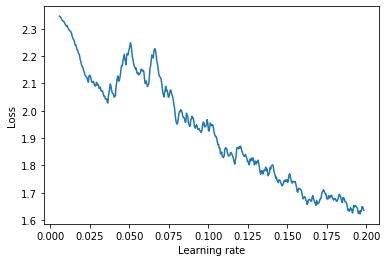

In [3]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=0.2, num_iter=500, step_mode="linear")
# lr_finder.range_test(trainloader, val_loader=testloader, end_lr=1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


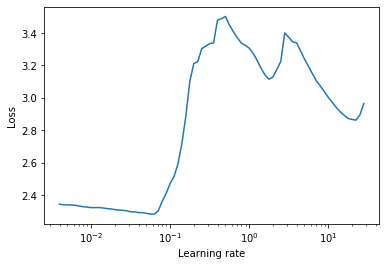

In [5]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state